In [1]:
#importing necessary libraires
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
punct = string.punctuation
nlp = spacy.load('en_core_web_sm')
stopwords = list(STOP_WORDS)

In [3]:
#importing the dataset
df=pd.read_csv(r"C:\Users\hp\Desktop\data\root2ai.csv")
df

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech


In [4]:
# Removing Null Values
df=df.dropna()
df

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech


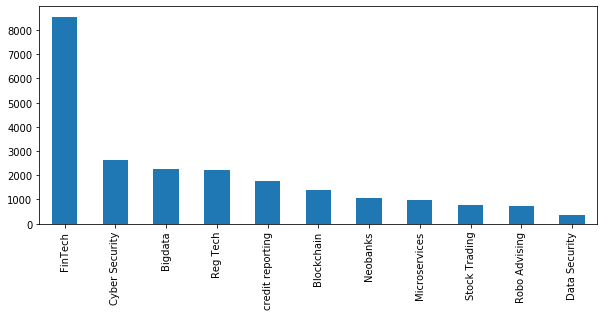

In [5]:
my_target=['FinTech', 'Cyber Security', 'Bigdata', 'Reg Tech', 'credit reporting',
       'Blockchain', 'Neobanks', 'Microservices', 'Stock Trading',
       'Robo Advising', 'Data Security']
plt.figure(figsize=(10,4))
df.Target.value_counts().plot(kind='bar');

In [6]:
#checking example
def print_plot(index):
    example = df[df.index == index][['Text', 'Target']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)

meanwhile bank digital division harness technology according news
Tag: Blockchain


In [7]:
print_plot(20)

however question whether technology ready widespread adoption whether truly upsides cannot conventional
Tag: Blockchain


In [8]:
#Cleaning the dataset
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [9]:
#Splitting the Data
X = df.Text
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [10]:
X_train.shape, X_test.shape

((15890,), (6811,))

Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LogisticRegression(n_jobs=1, C=1e5)

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])



clf.fit(X_train, y_train)




C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=<function text_data_cleaning at 0x000001F9CAA08EE8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    f

In [12]:
y_pred = clf.predict(X_test)



In [13]:
clf.score(X_test, y_test)

0.6156217882836588

In [14]:
clf.score(X_train, y_train)

0.9206419131529263

In [15]:
accuracy_score(y_pred, y_test)

0.6156217882836588

Support Vector Machine Model

In [16]:
from sklearn.linear_model import SGDClassifier
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
               

In [17]:
svc = Pipeline([('tfidf', tfidf), ('clf', classifier)])


In [18]:
svc.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', lo

In [19]:
y_pred = svc.predict(X_test)

In [20]:
svc.score(X_test, y_test)

0.6100425781823521

In [21]:
svc.score(X_train,y_train)

0.6770925110132159

In [22]:
accuracy_score(y_pred, y_test)

0.6100425781823521

Naive Bayes Classifier Model

In [25]:
from sklearn.naive_bayes import MultinomialNB
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = MultinomialNB()

In [26]:
nbc = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [27]:
nbc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x000001F9CAA08EE8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=Fals

In [28]:
y_pred=nbc.predict(X_test)

In [29]:
nbc.score(X_test,y_test)

0.5071208339450888

In [30]:
nbc.score(X_train,y_train)

0.5494021397105098

In [31]:
accuracy_score(y_pred, y_test)

0.5071208339450888

-------------------------------------------------End of Code-------------------------------------------------------------------